### stacked bar plot

In [3]:
import xarray as xr
import numpy as np

import pyxpcm
from pyxpcm.models import pcm

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

import Plotter
from Plotter import Plotter #new class for plots in pyxpcm

from PIL import Image

import importlib

In [4]:
m = pyxpcm.load_netcdf('models/tests_model_GLOBAL_REANALYSIS_PHY_001_030_temp.nc')
ds = xr.open_dataset('models/tests_ds_GLOBAL_REANALYSIS_PHY_001_030_temp.nc')

In [29]:
P = Plotter(ds, m)

In [27]:
def temporal_distribution(ds, m, time_variable, time_bins, pond):
    '''Plot temporal distribution of classes by moth or by season

       Parameters
        ----------
            time_variable: time variable name
            time_bins: 'month' or 'season'
            pond: 'abs' or 'rel' (divided by total nomber of observation in time bin)

        Returns
        -------

    '''

    # check if more than one temporal step
    assert (len(ds[time_variable]) >
            1), "Length of time variable should be > 1"

    # data to be plot
    # TODO: is it the best way??
    pcm_labels = ds['PCM_LABELS']
    kmap = m.plot.cmap(name='Accent')

    if time_bins == 'month':
        xaxis_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May',
                            'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    if time_bins == 'season':
        seasons_dict = {1: 'DJF', 2: 'MAM', 3: 'JJA', 4: 'SON'}
        xaxis_labels = ['DJF', 'MAM', 'JJA', 'SON']

    width = 0.8/(m.K)  # the width of the bars
    fig, ax = plt.subplots(figsize=(10, 6))
    kmap = m.plot.cmap()  # TODO: function already in pyxpcm

    # loop in k for counting
    for cl in range(m.K):
        # get time array with k=cl
        pcm_labels_k = pcm_labels.where(pcm_labels == cl)

        if cl == 0:
            counts_k = pcm_labels_k.groupby(
                time_variable + '.' + time_bins).count(...)
        else:
            counts_k = xr.concat([counts_k, pcm_labels_k.groupby(
                time_variable + '.' + time_bins).count(...)], "k")

    if pond == 'rel':
        counts_k = counts_k/sum(counts_k)*100
    
    #start point in stacked bars
    counts_cum = counts_k.cumsum(axis=0)

    # loop for plotting
    for cl in range(m.K):

        if time_bins == 'month':
            starts = counts_cum.isel(k=cl) - counts_k.isel(k=cl)
            ax.barh(counts_k.month, counts_k.isel(k=cl), left=starts, color=kmap(cl), label='K=' + str(cl))
            #, width, label='K=' + str(cl),
                    
        if time_bins == 'season':
            x_ticks_k = []
            for i in range(len(counts_k.season)):
                x_ticks_k.append(
                    list(seasons_dict.values()).index(counts_k.season[i])+1)
                # print(x_ticks_k)
            # plot
            starts = counts_cum.isel(k=cl) - counts_k.isel(k=cl)
            ax.barh(x_ticks_k, counts_k.isel(k=cl), left=starts, label='K=' + str(cl),
                    color=kmap(cl))

    # format
    title_string = r'Number of profiles in each class by $\bf{' + time_bins + '}$'
    ylabel_string = 'Number of profiles'
    if pond == 'rel':
        title_string = title_string + '\n (% of profiles in each bin)'
        ylabel_string = '% of profiles'

    ax.set_yticks(np.arange(1, len(xaxis_labels)+1))
    ax.set_yticklabels(xaxis_labels, fontsize=12)
    plt.yticks(fontsize=12)
    ax.legend(fontsize=12, bbox_to_anchor=(1.01, 1), loc='upper left')
    #ax.set_xticks(np.arange(0.5, len(xaxis_labels)+1.5), minor=True)
    #ax.grid(axis='x', which='minor', alpha=0.5, ls='--')
    ax.set_xlabel(ylabel_string, fontsize=12)
    ax.set_title(title_string, fontsize=14)
    fig.tight_layout()

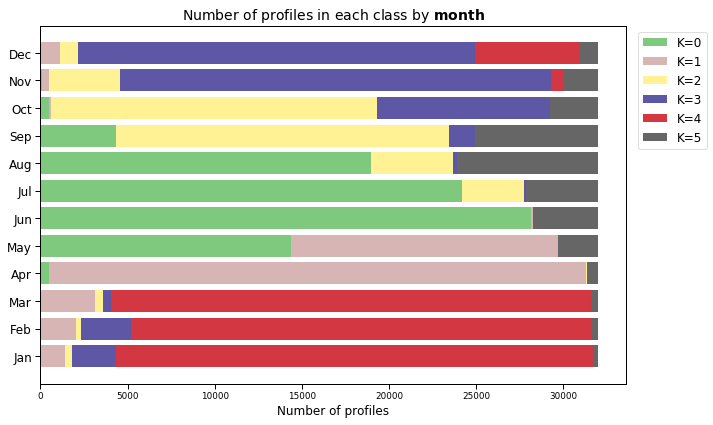

In [35]:
temporal_distribution(ds, m, time_variable='time', time_bins='month', pond='abs')
#P.save_BlueCloud('figures/stacked_plot_test_month.png')